In [1]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
file = Path('Resources/crypto_data.csv')
csv_df = pd.read_csv(file)
csv_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
crypto_df = csv_df[csv_df.IsTrading == True]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
crypto_drop_df = crypto_df.drop(columns=["IsTrading"])
crypto_drop_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
crypto_df = crypto_drop_df.dropna()
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
cryptona_df = cryptona_df.drop(columns=["CoinName", "Unnamed: 0"])
cryptona_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [8]:
numeric = pd.get_dummies(cryptona_df, columns=['Algorithm', 'ProofType'])
numeric

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
scaled = StandardScaler().fit_transform(numeric)
scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [10]:
pca_model = PCA(n_components= 0.90)

crypto_df_pca = pca_model.fit_transform(scaled)

In [11]:
crypto_data = pd.DataFrame(
    data= crypto_df_pca
)
crypto_data

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-2.653838e-14,6.639677e-14,-6.440829e-12,-0.007129,-1.319756,-0.051813,...,1.451268e-15,4.071312e-15,4.251486e-16,-3.867178e-15,1.088821e-15,-1.507344e-15,3.770877e-16,-8.155698e-16,-2.587204e-15,3.857329e-16
1,-0.318434,1.032331,-0.591126,0.001386,-2.656356e-14,6.662051e-14,-6.388138e-12,-0.007739,-1.322514,-0.056674,...,2.232661e-15,4.528427e-15,2.936346e-16,-3.964966e-15,1.319533e-15,-1.267503e-15,5.445319e-16,-9.519875e-16,-2.720565e-15,2.961997e-16
2,2.305468,1.656383,-0.683617,0.004731,-3.153905e-14,9.830331e-14,-2.183025e-11,-0.054781,-1.542879,-0.943951,...,-5.278580e-15,-9.107445e-14,4.058723e-15,9.095403e-14,-2.948347e-14,2.946939e-14,-3.166130e-14,2.651455e-14,-2.308712e-14,1.003783e-14
3,-0.145184,-1.320593,0.192813,-0.001229,8.514057e-15,-2.323967e-14,5.668376e-12,-0.002071,0.281463,0.251862,...,1.151062e-14,-2.860770e-14,5.546727e-15,3.154610e-14,-1.371917e-15,2.649402e-14,1.940026e-15,-1.845578e-14,-1.554007e-14,9.296737e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.733670e-14,-4.613233e-14,7.861936e-12,0.027735,0.519099,0.188820,...,1.461723e-13,-1.105693e-13,-1.310950e-14,1.858821e-13,-8.603260e-15,1.690800e-13,1.949518e-13,-1.154677e-13,-1.086622e-13,4.513292e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,1.047244e-14,3.268675e-14,3.810286e-11,-0.851713,2.041159,3.560713,...,1.365072e-14,-3.206914e-14,6.792202e-15,3.563619e-14,-7.505968e-16,2.587720e-14,6.408766e-15,-2.114767e-14,-1.724814e-14,1.019895e-14
528,-0.333144,1.032071,-0.590740,0.001399,-2.664739e-14,6.659974e-14,-6.451529e-12,-0.007154,-1.320125,-0.052460,...,1.475414e-15,4.391612e-15,4.801529e-16,-3.764960e-15,1.055423e-15,-1.253712e-15,2.673699e-16,-9.915349e-16,-2.473278e-15,4.352369e-16
529,0.324349,-2.312308,0.421515,-0.001319,1.694243e-14,-4.711625e-14,6.077067e-12,0.017309,0.161077,-0.047787,...,1.465501e-14,-9.172750e-14,-2.947745e-15,1.170450e-13,3.339085e-14,6.731395e-14,1.242185e-13,-5.562556e-14,3.782629e-14,3.964333e-14
530,-0.149364,-2.049336,0.412968,-0.001745,1.783788e-14,-4.843415e-14,8.044533e-12,0.028954,0.544389,0.233373,...,-4.489859e-16,-6.051414e-15,3.146204e-15,-1.669795e-15,4.930174e-16,-2.863632e-16,6.574031e-16,3.943429e-15,4.254257e-15,1.340069e-15


In [12]:
tsne = TSNE(learning_rate=35)

tsne_model = tsne.fit_transform(crypto_data)

In [14]:
tsne_model.shape

(532, 2)

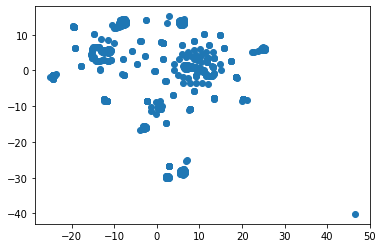

In [16]:
crypto_data['x'] = tsne_model[:,0]


crypto_data['y'] = tsne_model[:,1]


plt.scatter(crypto_data['x'], crypto_data['y'])
plt.show()

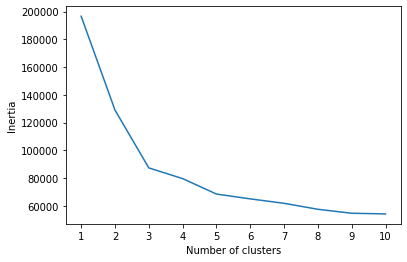

In [17]:

inertia = []

k = [1,2,3,4,5,6,7,8,9,10]


for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_data)
    inertia.append(km.inertia_)


elbow_data = {"k": k, "inertia": inertia}
df_elbowcurve = pd.DataFrame(elbow_data)

plt.plot(df_elbowcurve['k'], df_elbowcurve['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()